In [2]:
import numpy as np

In [3]:
pip install notebook

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('laptop_data.csv')

In [11]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [12]:
df.shape

(1303, 12)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [14]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

#Duplicated values

In [18]:
df.duplicated().sum()

0

#Data Cleaning

In [19]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [20]:
df.drop(columns=['Unnamed: 0'],inplace=True)

df.head()

**Data Manipulation**

In [23]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

In [24]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [25]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


**Data Analysis**

In [27]:
import seaborn as sns

In [28]:
df['Price'].describe()

count      1303.000000
mean      59870.042910
std       37243.201786
min        9270.720000
25%       31914.720000
50%       52054.560000
75%       79274.246400
max      324954.720000
Name: Price, dtype: float64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Count'>

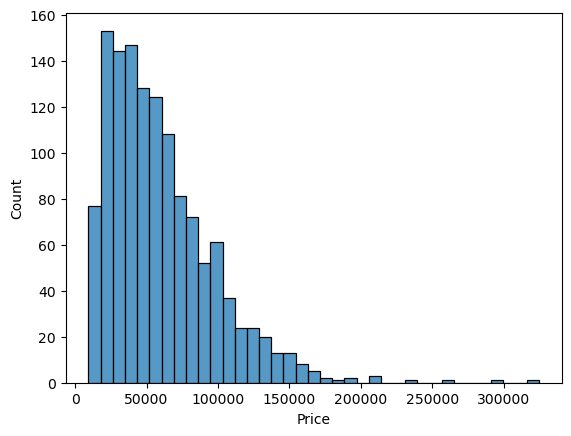

In [29]:
sns.histplot(df['Price'])

In [30]:
df['Company'].describe()

count     1303
unique      19
top       Dell
freq       297
Name: Company, dtype: object

<Axes: xlabel='Company'>

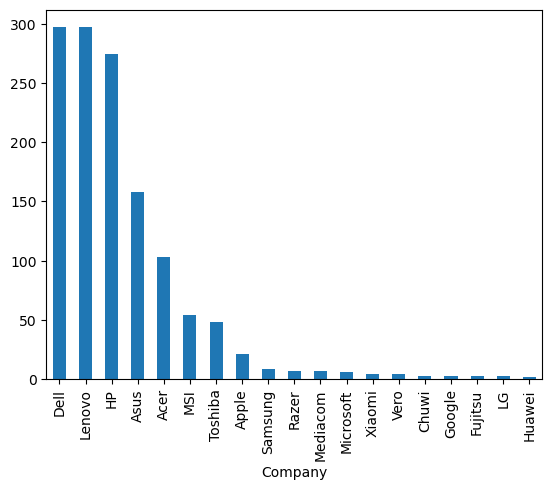

In [31]:
df['Company'].value_counts().plot(kind='bar')

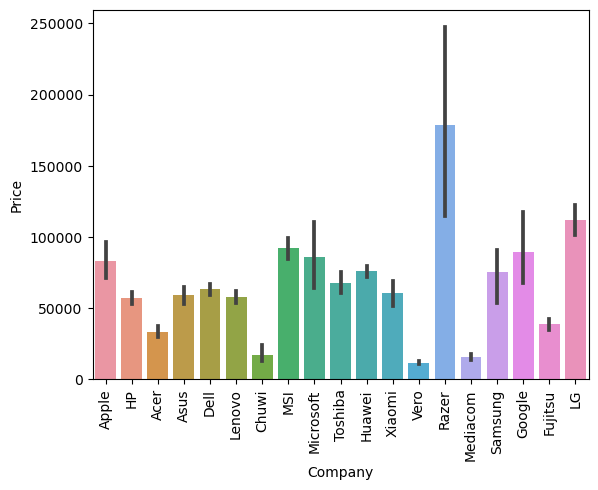

In [32]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

**Observation : According to the data, the price of Razer's laptop is the highest compared to other companies.**

In [33]:
df['TypeName'].describe()

count         1303
unique           6
top       Notebook
freq           727
Name: TypeName, dtype: object

In [34]:
df['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

<Axes: xlabel='TypeName'>

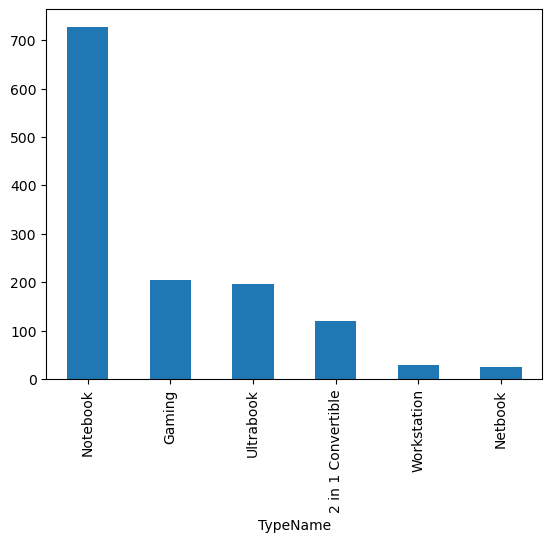

In [35]:
df['TypeName'].value_counts().plot(kind='bar')

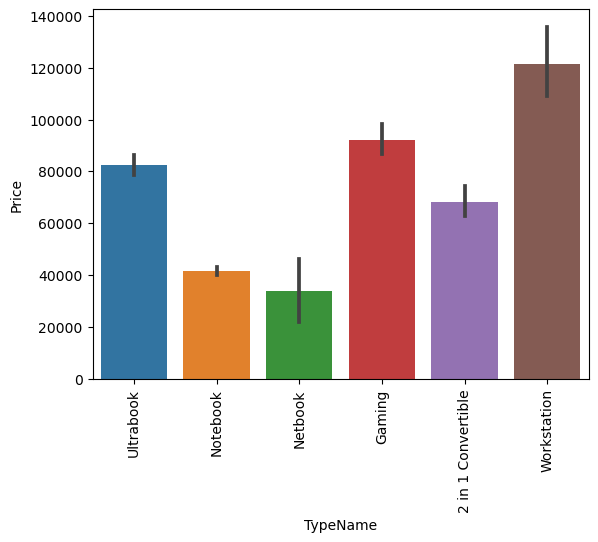

In [36]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

**Observation : According to the data, the price of a workstation-type laptop is nearly 120000 which is the highest compared to other types of laptops.**

In [37]:
df['Inches'].describe()

count    1303.000000
mean       15.017191
std         1.426304
min        10.100000
25%        14.000000
50%        15.600000
75%        15.600000
max        18.400000
Name: Inches, dtype: float64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Inches', ylabel='Count'>

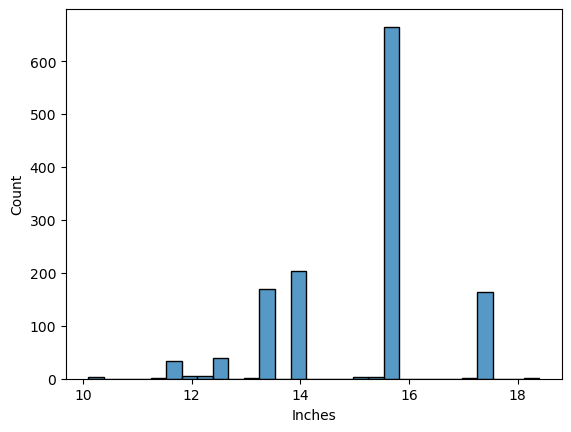

In [38]:
sns.histplot(df['Inches'])

<Axes: xlabel='Inches', ylabel='Price'>

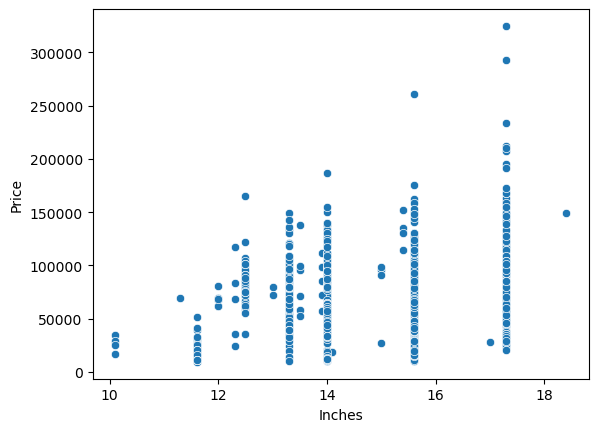

In [39]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

**Observation: As Inches are increasing, the price of the laptops is also increasing.**

In [40]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [41]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [42]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
689,Lenovo,Notebook,15.6,1366x768,Intel Celeron Dual Core 3855U 1.6GHz,4,500GB HDD,Intel HD Graphics 510,Windows 10,2.10,16943.040,0
785,MSI,Gaming,14.0,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,1.60,100752.480,0
586,HP,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,3.78,79813.440,0
607,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,6,1TB HDD,Intel HD Graphics 620,Windows 10,2.40,30049.920,0
881,HP,2 in 1 Convertible,15.6,Touchscreen 1366x768,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,2.30,36486.144,1


<Axes: xlabel='Touchscreen'>

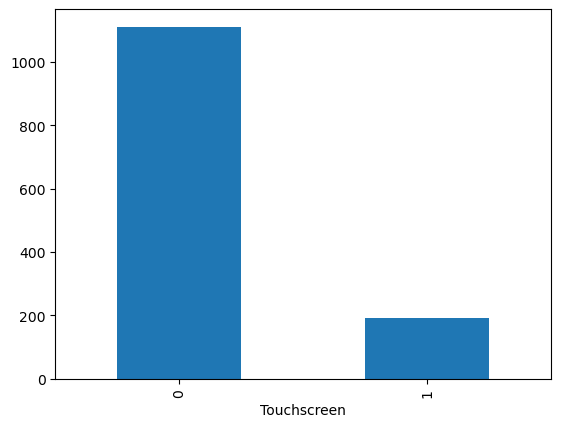

In [43]:
df['Touchscreen'].value_counts().plot(kind='bar')

<Axes: xlabel='Touchscreen', ylabel='Price'>

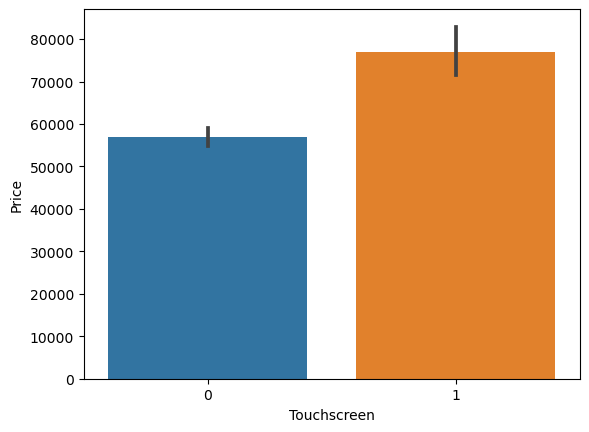

In [44]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])

**Observation: The laptops without touchscreen feature are comparetively cheaper than the laptops with touchscreeen feature.**

In [45]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [46]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


<Axes: xlabel='Ips'>

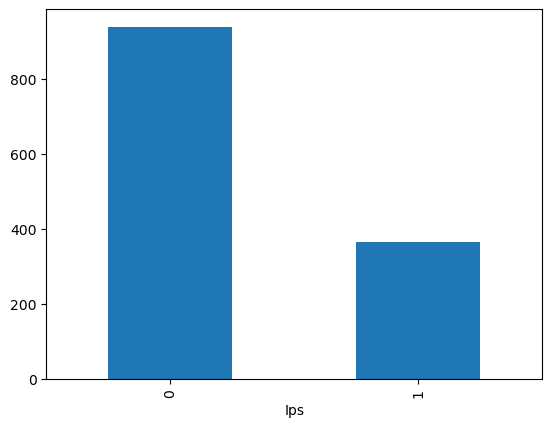

In [47]:
df['Ips'].value_counts().plot(kind='bar')

<Axes: xlabel='Ips', ylabel='Price'>

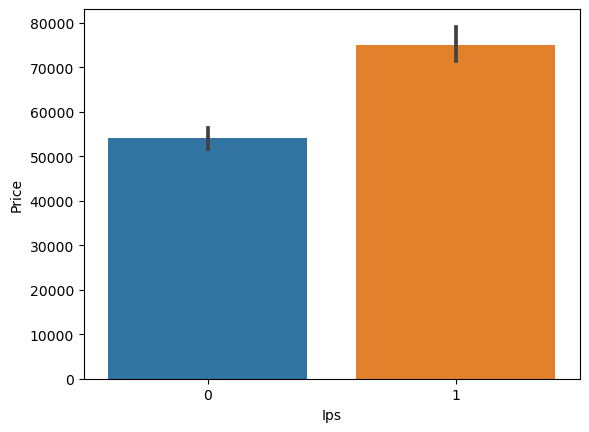

In [48]:
sns.barplot(x=df['Ips'],y=df['Price'])

In [49]:
new = df['ScreenResolution'].str.split('x',n=1,expand=True)

In [50]:
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [51]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
810,HP,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,12,1TB HDD,AMD Radeon RX 580,Windows 10,3.74,93186.7200,0,1,IPS Panel Full HD 1920,1080
1219,Acer,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7Y75 1.3GHz,8,256GB SSD,Intel HD Graphics 615,Windows 10,1.20,61218.7200,1,1,IPS Panel Full HD / Touchscreen 1920,1080
276,Dell,Notebook,17.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,128GB SSD + 1TB HDD,AMD Radeon 530,Linux,2.80,58554.7200,0,0,Full HD 1920,1080
1272,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,1366,768
1254,Dell,Notebook,15.6,1366x768,Intel Pentium Quad Core N3700 1.6GHz,4,500GB HDD,Intel HD Graphics,Windows 10,2.20,23655.7872,0,0,1366,768


In [52]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [53]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [54]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


In [56]:
print("Inches:",df['Inches'].corr(df['Price']))
print("Ram:",df['Ram'].corr(df['Price']))
print("Weight:",df['Weight'].corr(df['Price']))
print("Touchscreen:",df['Touchscreen'].corr(df['Price']))
print("IPS:",df['Ips'].corr(df['Price']))

Inches: 0.06819666592963954
Ram: 0.7430071352506965
Weight: 0.21036980196834212
Touchscreen: 0.1912264637867221
IPS: 0.2522076196530885


In [57]:
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [58]:
print("ppi:",df['ppi'].corr(df['Price']))

ppi: 0.47348730766086056


In [59]:
df.drop(columns=['ScreenResolution'],inplace=True)

In [60]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [61]:
df.drop(columns=['Inches','X_res','Y_res'],inplace=True)

In [62]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [63]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [64]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [65]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [66]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [67]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

In [68]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


<Axes: xlabel='Cpu brand'>

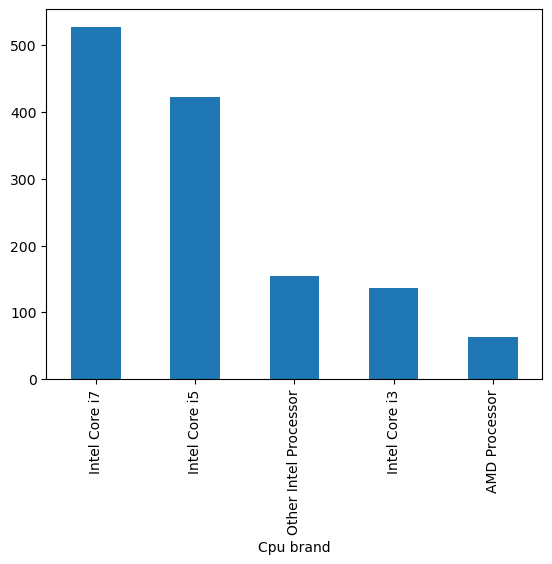

In [69]:
df['Cpu brand'].value_counts().plot(kind='bar')

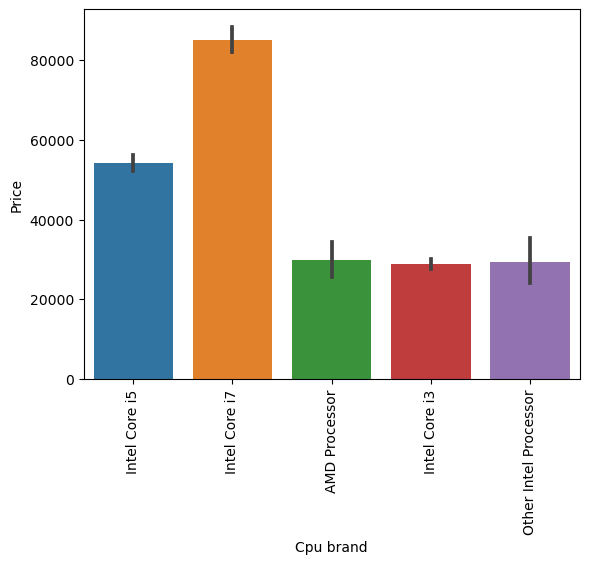

In [70]:
sns.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

**Observation: The price of Intel Core i7 is the highest compared with other CPU brands**

In [71]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [72]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [73]:
df['Ram'].describe()

count    1303.000000
mean        8.382195
std         5.084665
min         2.000000
25%         4.000000
50%         8.000000
75%         8.000000
max        64.000000
Name: Ram, dtype: float64

<Axes: xlabel='Ram'>

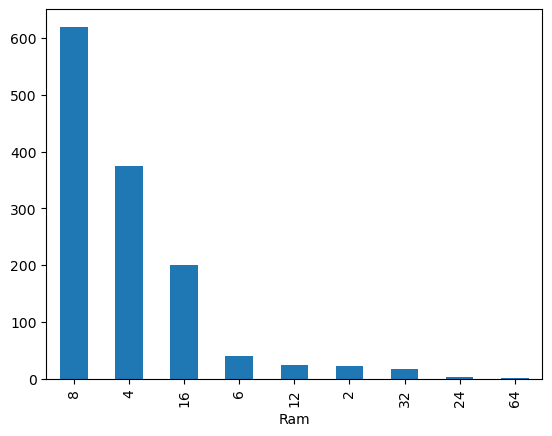

In [74]:
df['Ram'].value_counts().plot(kind='bar')

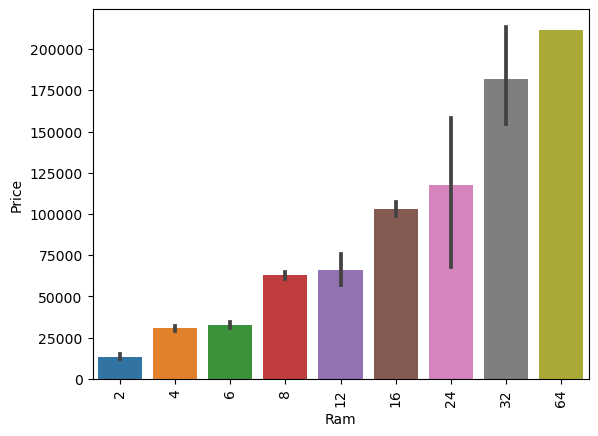

In [76]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

**Observation: As Ram's capacity increases, it becomes more expensive.**

In [77]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [78]:
df['HDD'] = df['Memory'].str.extract('(\d+)GB\s*HDD', expand=False).astype(float)
df['SSD'] = df['Memory'].str.extract('(\d+)GB\s*SSD', expand=False).astype(float)

In [79]:
df['HDD'].describe()

count    136.000000
mean     493.823529
std       51.078717
min       32.000000
25%      500.000000
50%      500.000000
75%      500.000000
max      500.000000
Name: HDD, dtype: float64

In [80]:
df['HDD'].isnull().sum()

1167

In [81]:
df['SSD'].describe()

count    827.000000
mean     268.590085
std      122.188914
min        8.000000
25%      256.000000
50%      256.000000
75%      256.000000
max      512.000000
Name: SSD, dtype: float64

In [82]:
df['SSD'].isnull().sum()

476

In [83]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD
90,Asus,Gaming,8,1TB HDD,AMD Radeon RX 560,Windows 10,2.45,37242.72,0,0,141.211998,AMD Processor,NaN,NaN
657,Dell,Notebook,16,256GB SSD + 2TB HDD,AMD Radeon 530,Windows 10,2.20,60472.80,0,0,141.211998,Intel Core i7,NaN,256.0
47,Asus,Gaming,8,256GB SSD + 1TB HDD,AMD Radeon RX 580,Windows 10,3.20,69210.72,0,0,127.335675,AMD Processor,NaN,256.0
228,Asus,Notebook,8,256GB SSD + 500GB HDD,Nvidia GeForce GTX 950M,Windows 10,2.69,47472.48,0,0,127.335675,Intel Core i5,500.0,256.0
423,Asus,Notebook,8,1TB HDD,Nvidia GeForce 940MX,Linux,2.30,31808.16,0,0,141.211998,Intel Core i3,NaN,NaN


In [84]:
df['HDD'].fillna(0,inplace=True)
df['SSD'].fillna(0,inplace=True)

In [85]:
df['SSD'].value_counts()

SSD
256.0    500
0.0      476
128.0    172
512.0    138
32.0       6
180.0      5
16.0       3
64.0       1
240.0      1
8.0        1
Name: count, dtype: int64

In [86]:
df['SSD'].describe()

count    1303.000000
mean      170.471220
std       161.898402
min         0.000000
25%         0.000000
50%       128.000000
75%       256.000000
max       512.000000
Name: SSD, dtype: float64

In [87]:
df.drop(columns=['Memory'],inplace=True)

In [88]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0.0,128.0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0.0,0.0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0.0,256.0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0.0,512.0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0.0,256.0


In [89]:
print("Ram:",df['Ram'].corr(df['Price']))
print("Weight:",df['Weight'].corr(df['Price']))
print("Touchscreen:",df['Touchscreen'].corr(df['Price']))
print("IPS:",df['Ips'].corr(df['Price']))
print("HDD:",df['HDD'].corr(df['Price']))
print("SSD:",df['SSD'].corr(df['Price']))

Ram: 0.7430071352506965
Weight: 0.21036980196834212
Touchscreen: 0.1912264637867221
IPS: 0.2522076196530885
HDD: -0.23461974046538892
SSD: 0.5528897919911637


In [90]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0.0,128.0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0.0,0.0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0.0,256.0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0.0,512.0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0.0,256.0


In [91]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [92]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [93]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0.0,128.0,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0.0,0.0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0.0,256.0,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0.0,512.0,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0.0,256.0,Intel


In [94]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [95]:
df = df[df['Gpu brand'] != 'ARM']

In [96]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

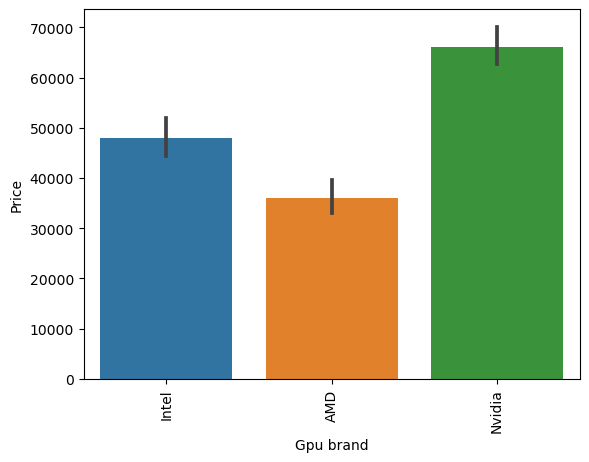

In [97]:
sns.barplot(x=df['Gpu brand'],y=df['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()


**Observation: The price of Nvidia's GPU is the highest compared to Intel and AMD.**

In [98]:
df.drop(columns=['Gpu'],inplace=True)

In [99]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0.0,128.0,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0.0,0.0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0.0,256.0,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0.0,512.0,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0.0,256.0,Intel


In [100]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

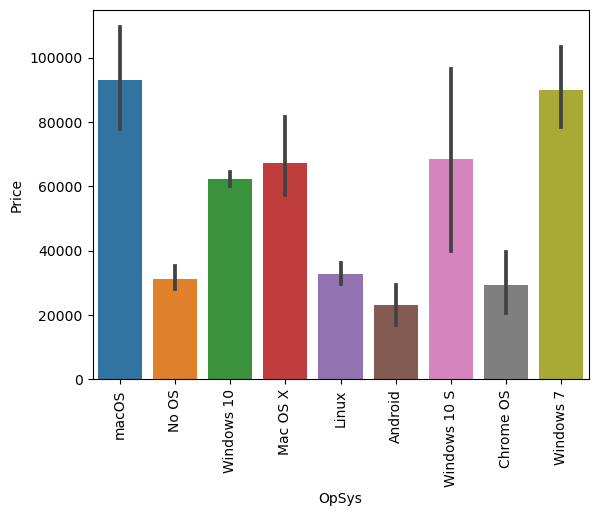

In [101]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

**Observation: The price of macOS operating system is more than 80000 which is higher than other operting systems.**

In [102]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [103]:
df['os'] = df['OpSys'].apply(cat_os)

In [104]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0.0,128.0,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0.0,0.0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0.0,256.0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0.0,512.0,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0.0,256.0,Intel,Mac


In [105]:
df.drop(columns=['OpSys'],inplace=True)

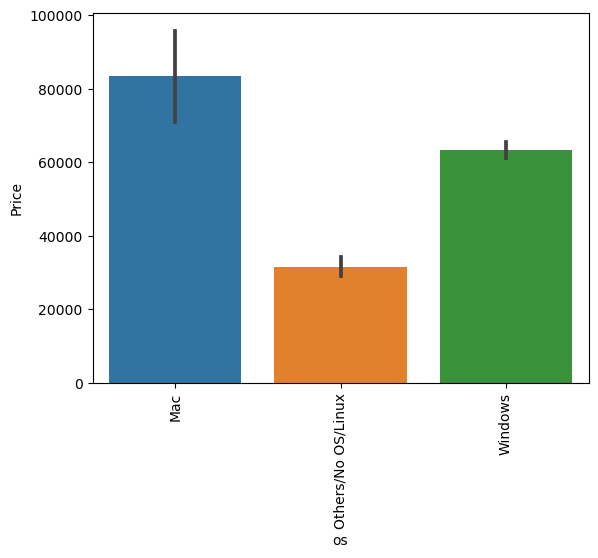

In [106]:
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Weight', ylabel='Count'>

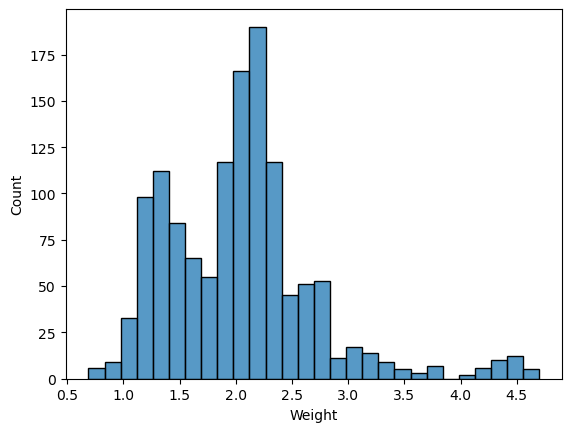

In [107]:
sns.histplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

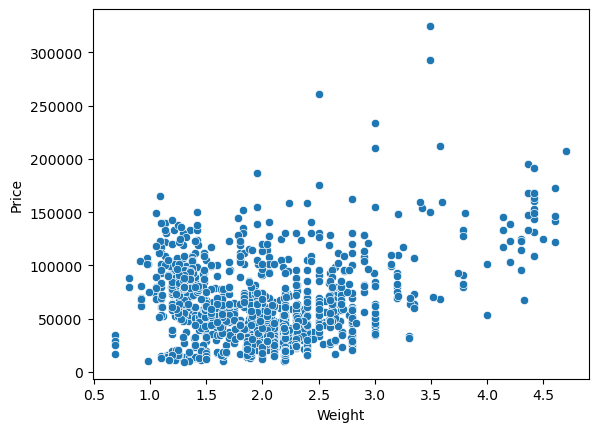

In [108]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Count'>

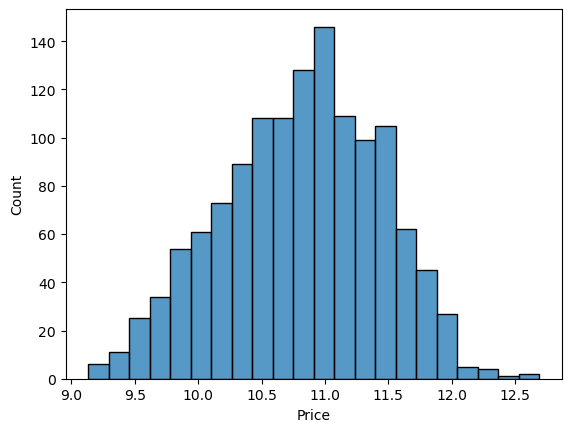

In [109]:
sns.histplot(np.log(df['Price']))

In [110]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [111]:
X

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0.0,128.0,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0.0,0.0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0.0,256.0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0.0,512.0,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0.0,256.0,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0.0,128.0,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0.0,512.0,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0.0,0.0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,0.0,0.0,AMD,Windows


In [112]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [113]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [114]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,0.0,128.0,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,0.0,128.0,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Other Intel Processor,0.0,0.0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,0.0,0.0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,0.0,128.0,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500.0,0.0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0.0,512.0,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,0.0,0.0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,0.0,0.0,Nvidia,Others/No OS/Linux


In [115]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [116]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

**Linear regression**

In [117]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('Mean square error',mean_squared_error(y_test,y_pred))

R2 score 0.8081732675500494
MAE 0.2116683746555719
Mean square error 0.07338353129159854


**Ridge Regression**

In [118]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('Mean square error',mean_squared_error(y_test,y_pred))

R2 score 0.812669892259759
MAE 0.2115174502732324
Mean square error 0.07166334247392343


**Lasso Regression**

In [119]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('Mean square error',mean_squared_error(y_test,y_pred))

R2 score 0.807290813780865
MAE 0.21312958871880233
Mean square error 0.07372111496910409


**KNN**

In [120]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('Mean square error',mean_squared_error(y_test,y_pred))

R2 score 0.8465930517957434
MAE 0.18586928167855657
Mean square error 0.05868599980887904


**Decision Tree**

In [121]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('Mean square error',mean_squared_error(y_test,y_pred))

R2 score 0.8417044406322599
MAE 0.1837548749993905
Mean square error 0.06055614348336172


**SVM**

In [122]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('Mean square error',mean_squared_error(y_test,y_pred))

R2 score 0.8501963407829478
MAE 0.18125177984593452
Mean square error 0.057307557572137215


**Random Forest**

In [123]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=5,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe_random_forest = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_random_forest.fit(X_train,y_train)

y_pred = pipe_random_forest.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('Mean square error',mean_squared_error(y_test,y_pred))

R2 score 0.8813012541341215
MAE 0.16233175681956058
Mean square error 0.04540833814074822


In [124]:
import pickle

pickle.dump(df,open('df.pkl','wb'))

In [125]:
df

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0.0,128.0,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0.0,0.0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0.0,256.0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0.0,512.0,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0.0,256.0,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,1,1,157.350512,Intel Core i7,0.0,128.0,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,1,1,276.053530,Intel Core i7,0.0,512.0,Intel,Windows
1300,Lenovo,Notebook,2,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0.0,0.0,Intel,Windows
1301,HP,Notebook,6,2.19,40705.9200,0,0,100.454670,Intel Core i7,0.0,0.0,AMD,Windows


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   object 
 1   TypeName     1302 non-null   object 
 2   Ram          1302 non-null   int32  
 3   Weight       1302 non-null   float32
 4   Price        1302 non-null   float64
 5   Touchscreen  1302 non-null   int64  
 6   Ips          1302 non-null   int64  
 7   ppi          1302 non-null   float64
 8   Cpu brand    1302 non-null   object 
 9   HDD          1302 non-null   float64
 10  SSD          1302 non-null   float64
 11  Gpu brand    1302 non-null   object 
 12  os           1302 non-null   object 
dtypes: float32(1), float64(4), int32(1), int64(2), object(5)
memory usage: 132.2+ KB


In [127]:
with open('pipe_random_forest.pkl', 'wb') as f:
    pickle.dump(pipe_random_forest, f)

# Function to make predictions using the trained model
def predict_laptop_price(Company, TypeName, Ram, Weight, Touchscreen, Ips, ppi, Cpu_brand, HDD, SSD, Gpu_brand, os):
    
    input_data = pd.DataFrame({
        'Company':[Company],
        'TypeName':[TypeName],
        'Ram': [Ram],
        'Weight': [Weight],
        'Touchscreen': [Touchscreen],
        'Ips': [Ips],
        'ppi': [ppi],
        'Cpu brand': [Cpu_brand],
        'HDD': [HDD],
        'SSD': [SSD],
        'Gpu brand': [Gpu_brand],
        'os': [os]
    })
    
    # Make prediction using the trained model
    predicted_log_price = pipe_random_forest.predict(input_data)
    # Apply inverse transformation to get the actual price
    predicted_price = np.exp(predicted_log_price)
    return predicted_price[0]


predicted_price = predict_laptop_price('Apple','Ultrabook',8,1.37, 0, 1, 226.983005, 'Intel Core i5', 0.0, 128.0, 'Intel', 'Mac')
print("Predicted Price:", predicted_price)

Predicted Price: 70087.51737756463


In [128]:
with open('pipe_random_forest.pkl', 'wb') as f:
    pickle.dump(pipe_random_forest, f)

# Function to make predictions using the trained model
def predict_laptop_price(Company, TypeName, Ram, Weight, Touchscreen, Ips, ppi, Cpu_brand, HDD, SSD, Gpu_brand, os):
    
    input_data = pd.DataFrame({
        'Company':[Company],
        'TypeName':[TypeName],
        'Ram': [Ram],
        'Weight': [Weight],
        'Touchscreen': [Touchscreen],
        'Ips': [Ips],
        'ppi': [ppi],
        'Cpu brand': [Cpu_brand],
        'HDD': [HDD],
        'SSD': [SSD],
        'Gpu brand': [Gpu_brand],
        'os': [os]
    })
    
    # Make prediction using the trained model
    predicted_log_price = pipe_random_forest.predict(input_data)
    # Apply inverse transformation to get the actual price
    predicted_price = np.exp(predicted_log_price)
    return predicted_price[0]


predicted_price = predict_laptop_price('HP','Notebook',8,1.86, 0, 0, 141.211998, 'Intel Core i5', 0.0, 256.0, 'Intel', 'Others/No OS/Linux')
print("Predicted Price:", predicted_price)

Predicted Price: 40714.991887053366


In [129]:
with open('pipe_random_forest.pkl', 'wb') as f:
    pickle.dump(pipe_random_forest, f)

# Function to make predictions using the trained model
def predict_laptop_price(Company, TypeName, Ram, Weight, Touchscreen, Ips, ppi, Cpu_brand, HDD, SSD, Gpu_brand, os):
    
    input_data = pd.DataFrame({
        'Company':[Company],
        'TypeName':[TypeName],
        'Ram': [Ram],
        'Weight': [Weight],
        'Touchscreen': [Touchscreen],
        'Ips': [Ips],
        'ppi': [ppi],
        'Cpu brand': [Cpu_brand],
        'HDD': [HDD],
        'SSD': [SSD],
        'Gpu brand': [Gpu_brand],
        'os': [os]
    })
    
    # Make prediction using the trained model
    predicted_log_price = pipe_random_forest.predict(input_data)
    # Apply inverse transformation to get the actual price
    predicted_price = np.exp(predicted_log_price)
    return predicted_price[0]


predicted_price = predict_laptop_price('Lenovo','2 in 1 Convertible',4,1.80, 1, 1, 157.350512, 'Intel Core i7', 0.0, 128.0, 'Intel', 'Windows')
print("Predicted Price:", predicted_price)

Predicted Price: 35126.00069918454
